In this example, I downloaded a machine-readable table from an ApJS journal article, read it in with astropy, converted it to a Pandas data frame, filtered the data, and then plotted a density plot using seaborn.  jrigby, june 2016

In [1]:
%pylab inline
from astropy.io import ascii
from astropy.table import Table
from matplotlib import pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
file = "http://iopscience.iop.org/0067-0049/203/2/24/suppdata/apjs449744t2_mrt.txt"
temp_table = ascii.read(file)

Astropy.Tables can read in a CDS format machine-readable table out-of-the-box, with no customizing.  Sweet!  However, I don't think astropy tables is nearly as powerful as Pandas Data Frames for filtering and manipulating.  I love Pandas!  So, I use the astropy to_pandas() to convert.  It wasn't really necessary for this example, but it'd be nice if we were doing heavier-duty math or filtering.

In [5]:
print "Have read in Table 2 of van der Wel 2012 as an Astropy table"
table = temp_table.to_pandas()  # Convert from astropy Table to Pandas Data Frame.  Needs astropy 1.2
print "Have converted to a Pandas Data frame"
print table.head()

Have read in Table 2 of van der Wel 2012 as an Astropy table
Have converted to a Pandas Data frame
  Field Filter  ID      RAdeg     DEdeg  Flag       mag      emag         r  \
0   UDS      H   1  34.223766 -5.278053     3 -999.0000 -999.0000 -999.0000   
1   UDS      H   2  34.223904 -5.277949     0   24.4141    0.3954    0.4312   
2   UDS      H   3  34.223492 -5.277952     0   25.1712    0.2306    0.1772   
3   UDS      H   4  34.265106 -5.277749     1   23.0603    0.1906    0.2663   
4   UDS      H   5  34.295372 -5.277648     1   21.0611    0.0957    1.1633   

       er         n        en         q        eq  PosAng  ePosAng    S/N  
0  0.0010 -999.0000 -999.0000 -999.0000 -999.0000 -999.00  -999.00   5.43  
1  0.1990    0.7970    1.0125    0.1761    0.2191   41.61    14.78   6.88  
2  0.0594    0.2670    0.2754    0.7431    0.2132  -52.04    25.86   8.57  
3  0.0636    1.4913    0.8395    0.7161    0.1513   67.92    10.55  13.33  
4  0.1199    1.5496    0.2675    0.7983    0.0

In [ ]:
good = table[table['Flag'].eq(0)]  # filter out bad Galfit fits
H = good[good['Filter'].str.contains("H")]  # filter just H-band
J = good[good['Filter'].str.contains("J")]  # filter just J-band
small = H[H['ID'].lt(3000)]  # make a small subset of H, for quick plotting

<Container object of 3 artists>

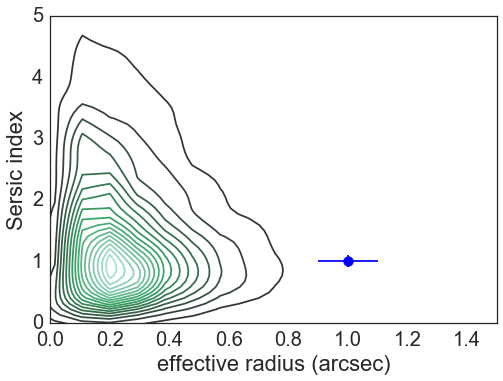

In [11]:
# plot the result as a density plot.  First plot just a subset, so it's fast.
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.kdeplot(small.r, small.n, n_levels=22)
ax.set_xlim(0,1.5)
ax.set_ylim(0,5)
ax.set_xlabel("effective radius (arcsec)")
ax.set_ylabel("Sersic index")
plt.scatter(1,1,color='b', s=100)
plt.errorbar(1,1,0.1,0.1, ecolor='b')

<Container object of 3 artists>

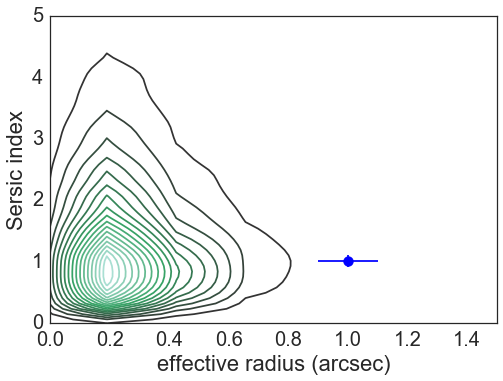

In [12]:
# Plot again, but for the full dataset (slow...)
ax = sns.kdeplot(H.r, H.n, n_levels=22)
ax.set_xlim(0,1.5)
ax.set_ylim(0,5)
ax.set_xlabel("effective radius (arcsec)")
ax.set_ylabel("Sersic index")
plt.scatter(1,1,color='b', s=100)
plt.errorbar(1,1,0.1,0.1, ecolor='b')

Groovy!  We sucked in the catalog of van der Wel 2012, manipulated it, and plotted it.  Time for a cookie.